In [22]:
import pandas as pd
import numpy as np
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler

In [91]:
dados = pd.read_csv('credit_data.csv')
dados.head()

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [92]:
dados.isnull().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [93]:
dados = dados.dropna()

dados.loc[dados['age'] < 0].head()

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [94]:
dados.loc[dados.age < 0, 'age'] = dados['age'].mean()

In [95]:
X = dados.iloc[:,0:4].values
Y = dados.iloc[:,4].values

In [96]:
scaler = MinMaxScaler(feature_range=(0,1))

X = scaler.fit_transform(X)

$$  \sqrt(\sqrt size*5)  $$

In [97]:
print(np.sqrt(((np.sqrt(X.shape[0]))*5)))

14.947877097268472


In [98]:
som = MiniSom(x=15, y=15, input_len=4, random_seed=0)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

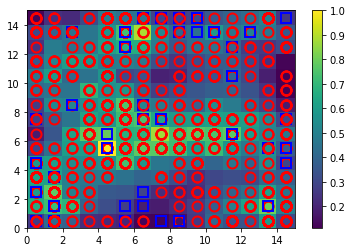

In [99]:
from pylab import plot, pcolor, colorbar

pcolor(som.distance_map().T)
colorbar()

markers = ['o', 's']
colors = ['r', 'blue']

for i, x in enumerate(X):
  w = som.winner(x)
  plot(w[0]+0.5, w[1]+0.5, markers[Y[i]],
       markerfacecolor = 'None', markersize = 10, 
       markeredgecolor = colors[Y[i]], markeredgewidth = 2)

In [103]:
mapeamento = som.win_map(X)
suspeitos = np.concatenate((mapeamento[(4,5)], mapeamento[(11,6)]), axis=0)
suspeitos = scaler.inverse_transform(suspeitos)

classe = []

for i in range(len(dados)):
  for j in range(len(suspeitos)):
    if dados.iloc[i, 0] == int(round(suspeitos[j, 0])):
      classe.append(dados.iloc[i, 4])

classe = np.array(classe)

suspeitos_final = np.column_stack((suspeitos, classe))
suspeitos_final = suspeitos_final[suspeitos_final[:, 4].argsort()]

In [106]:
pd.DataFrame(suspeitos_final, columns=dados.columns)

,clientid,income,age,loan,default
0,821.0,65481.945551,45.038576,10614.248493,0.0
1,1110.0,27408.729615,37.691732,2591.028947,0.0
2,1615.0,27010.883768,36.609622,2373.175255,0.0
3,1123.0,23626.726789,34.293353,2173.767690,0.0
4,1599.0,30931.506020,35.882485,1074.787904,0.0
...,...,...,...,...,...
78,1305.0,22372.505236,31.493050,1118.926064,1.0
79,1362.0,24061.463161,34.511520,3980.578783,1.0
80,1374.0,31396.866012,34.996681,3719.230135,1.0
81,1454.0,28630.009508,27.291530,4406.995056,1.0
